In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

In [2]:
class GELU(nn.Module):
    def __init__(self):
        super().__init__()
    
    def forward(self, x):
        return 0.5 * x * (1 + torch.tanh(
            torch.sqrt(torch.tensor(2.0 / torch.pi)) *
            (x + 0.044715 * torch.pow(x, 3))))

In [3]:
gelu = GELU()
relu = nn.ReLU()

In [4]:
x = torch.linspace(-3, 3, 100) # Creates 100 sample data points in the range -3 to 3

y_gelu = gelu(x)
y_relu = relu(x)

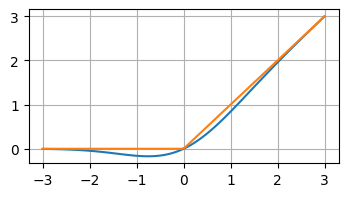

In [10]:
plt.figure(figsize=(4, 2))
plt.plot(x, y_gelu, label="GELU")
plt.plot(x, y_relu, label="ReLU")
plt.grid(True)
plt.show()

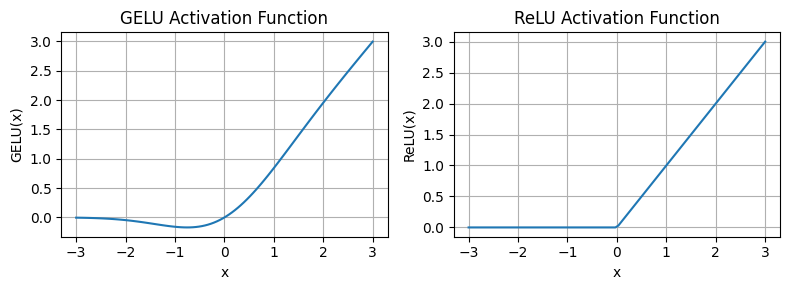

In [17]:
plt.figure(figsize=(8, 3))

for i, (y, label) in enumerate(zip([y_gelu, y_relu], ["GELU", "ReLU"]), 1):
    plt.subplot(1, 2, i)
    plt.plot(x, y)
    plt.title(f"{label} Activation Function")
    plt.xlabel("x")
    plt.ylabel(f"{label}(x)")
    plt.grid(True)

plt.tight_layout()
plt.show()

In [20]:
class FeedForward(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        
        self.layers = nn.Sequential(
            nn.Linear(cfg["emb_dim"], 4 * cfg["emb_dim"]),
            GELU(),
            nn.Linear(4 * cfg["emb_dim"], cfg["emb_dim"])
        )
    
    def forward(self, x):
        return self.layers(x)

<div align="center">
  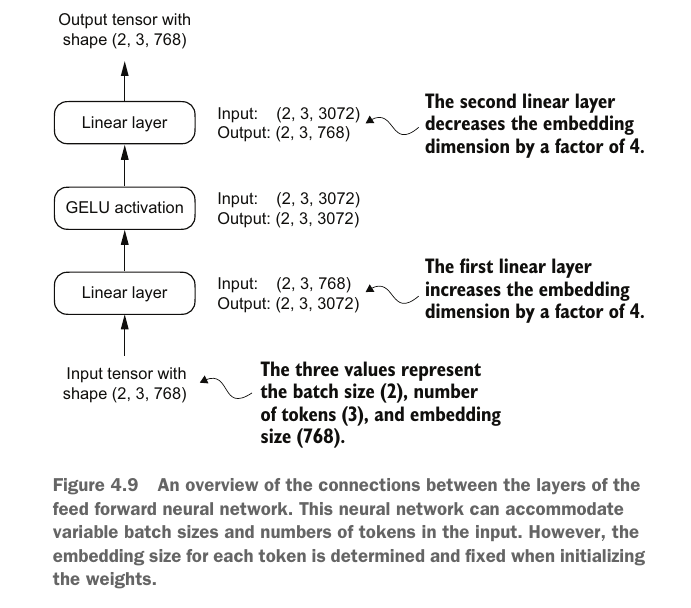
</div>

In [18]:
%run GPT_CONFIG_124M.ipynb

In [21]:
ffn = FeedForward(GPT_CONFIG_124M)

x = torch.rand(2, 3, 768) # Sample Input (Values ranges from 0 to 1)
out = ffn(x)

In [29]:
print("FNN Architecture:\n\n", ffn)

FNN Architecture:

 FeedForward(
  (layers): Sequential(
    (0): Linear(in_features=768, out_features=3072, bias=True)
    (1): GELU()
    (2): Linear(in_features=3072, out_features=768, bias=True)
  )
)


In [27]:
print("Output Shape =>", out.shape)

Output Shape => torch.Size([2, 3, 768])
